# Projeto - Relatório de fechamento de Mercado por e-mail

## Instalando bibliotecas necessárias

In [3]:
!pip install yfinance==0.1.74
!pip install mplcyberpunk

     |████████████████████████████████| 62 kB 2.3 MB/s eta 0:00:011
     |████████████████████████████████| 7.1 MB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 195 kB 11.4 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## Importando módulos necessários

In [38]:
import pandas as pd
import datetime
import yfinance as yf
from matplotlib import pyplot as plt
import mplcyberpunk
import win32.client as win32

## Pegar os dados do Yahoo Finance

In [5]:
codigos_de_negociacao = ["^BVSP", "BRL=X"]

hoje = datetime.datetime.now()
um_ano_atras = hoje - datetime.timedelta(days =365)

dados_mercado = yf.download(codigos_de_negociacao, um_ano_atras, hoje)

display(dados_mercado)

[*********************100%***********************]  2 of 2 completed


Adj Close             Close              High                 Low  \
               BRL=X     ^BVSP   BRL=X     ^BVSP   BRL=X     ^BVSP     BRL=X   
Date                                                                           
2022-02-07    5.3269  111996.0  5.3269  111996.0  5.3430  112517.0  5.276800   
2022-02-08    5.2626  112234.0  5.2626  112234.0  5.2849  112251.0  5.251000   
2022-02-09    5.2584  112461.0  5.2584  112461.0  5.2880  113163.0  5.232774   
2022-02-10    5.2345  113359.0  5.2345  113359.0  5.2446  113812.0  5.170000   
2022-02-11    5.2487  113572.0  5.2487  113572.0  5.2512  114899.0  5.182800   
...              ...       ...     ...       ...     ...       ...       ...   
2023-01-31    5.1149  113532.0  5.1149  113532.0  5.1337  113581.0  5.077500   
2023-02-01    5.0722  112303.0  5.0722  112303.0  5.0868  113598.0  5.047900   
2023-02-02    5.0535  109935.0  5.0535  109935.0  5.0545  112943.0  4.941700   
2023-02-03    5.0492  108490.0  5.0492  108490.0  5.1347  110570.0  5.046758   
2023-02-06    5.1498  108456.0  5.1498  108456.0  5.2060  108710.0  5.147992   

                          Open           Volume              
               ^BVSP     BRL=X     ^BVSP  BRL=X       ^BVSP  
Date                                                         
2022-02-07  111490.0  5.326200  112247.0      0  10672800.0  
2022-02-08  110943.0  5.262800  111995.0      0  10157500.0  
2022-02-09  111710.0  5.256489  112233.0      0  13794500.0  
2022-02-10  112163.0  5.231429  112462.0      0  13267900.0  
2022-02-11  113128.0  5.248600  113368.0      0  18602800.0  
...              ...       ...       ...    ...         ...  
2023-01-31  112145.0  5.114900  112273.0      0  12900200.0  
2023-02-01  110729.0  5.072200  113430.0      0  17821500.0  
2023-02-02  109747.0  5.053500  112072.0      0  15241800.0  
2023-02-03  108185.0  5.049200  110141.0      0  13235300.0  
2023-02-06  107416.0  5.149800  108518.0      0  11514600.0  

[261 rows x 12 columns]

## Removendo coluna dos dados de fechamento

In [10]:
dados_fechamento = dados_mercado['Adj Close']
dados_fechamento.columns = ['dolar', 'ibovespa']
dados_fechamento = dados_fechamento.dropna()
display(dados_fechamento)

,dolar,ibovespa
Date,,
2022-02-07,5.3269,111996.0
2022-02-08,5.2626,112234.0
2022-02-09,5.2584,112461.0
2022-02-10,5.2345,113359.0
2022-02-11,5.2487,113572.0
...,...,...
2023-01-31,5.1149,113532.0
2023-02-01,5.0722,112303.0
2023-02-02,5.0535,109935.0


## Agregação de dados Mensais e Anuais

In [14]:
dados_anuais = dados_fechamento.resample("Y").last()
dados_mensais = dados_fechamento.resample("M").last()
display(dados_anuais)
display(dados_mensais)

,dolar,ibovespa
Date,,
2022-12-31,5.2668,110031.0
2023-12-31,5.1498,108456.0


,dolar,ibovespa
Date,,
2022-02-28,5.1222,113142.0
2022-03-31,4.7697,119999.0
2022-04-30,4.9378,107876.0
2022-05-31,4.7524,111351.0
2022-06-30,5.1809,98542.0
2022-07-31,5.1827,103165.0
2022-08-31,5.1219,109523.0
2022-09-30,5.3962,110037.0
2022-10-31,5.2885,116037.0


## Retorno em diferentes períodos

In [24]:
retorno_anual = dados_anuais.pct_change().dropna()
retorno_mensal = dados_mensais.pct_change().dropna()
retorno_diario = dados_fechamento.pct_change().dropna()
retorno_diario

,dolar,ibovespa
Date,,
2022-02-08,-0.012071,0.002125
2022-02-09,-0.000798,0.002023
2022-02-10,-0.004545,0.007985
2022-02-11,0.002713,0.001879
2022-02-14,0.000239,0.002069
...,...,...
2023-01-31,0.001508,0.014693
2023-02-01,-0.008348,-0.010825
2023-02-02,-0.003687,-0.021086


## Localizar valor na tabela com loc e iloc

In [33]:
#retorno_09_fev_2022_loc = retorno_diario.loc['2022-02-09', 'dolar']
#retorno_09_fev_2022_iloc = retorno_diario.iloc[1, 0]

retorno_diario_dolar = retorno_diario.iloc[-1, 0]
retorno_diario_dolar = round((retorno_diario_dolar * 100), 2)

retorno_diario_ibovespa = retorno_diario.iloc[-1, 1]
retorno_diario_ibovespa = round((retorno_diario_ibovespa * 100), 2)


retorno_mensal_dolar = dados_mensais.iloc[-1, 0]
retorno_mensal_dolar = round((retorno_mensal_dolar * 100), 2)

retorno_mensal_ibovespa = dados_mensais.iloc[-1, 1]
retorno_mensal_ibovespa = round((retorno_mensal_ibovespa * 100), 2)


retorno_anual_dolar = retorno_anual.iloc[-1, 0]
retorno_anual_dolar = round((retorno_anual_dolar * 100), 2)

retorno_anual_ibovespa = retorno_anual.iloc[-1, 1]
retorno_anual_ibovespa = round((retorno_anual_ibovespa * 100), 2)
retorno_anual_ibovespa

-1.43

## Criar gráfico com base nos dados de fechamento

### Ibovespa

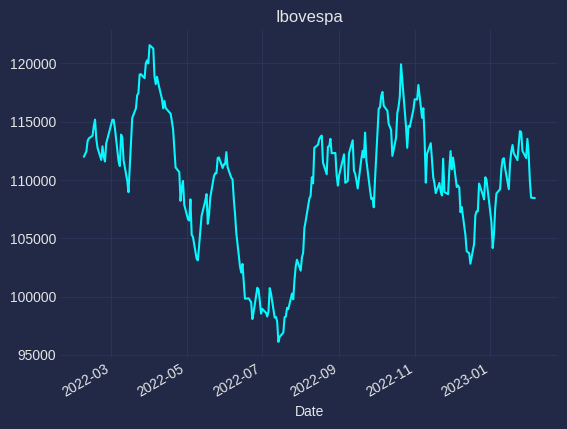

In [41]:
plt.style.use('cyberpunk')
dados_fechamento.plot(y = 'ibovespa', use_index = True, legend = False)
plt.title('Ibovespa')
plt.savefig('ibovespa.png', dpi=300)
plt.show()

### Dolar

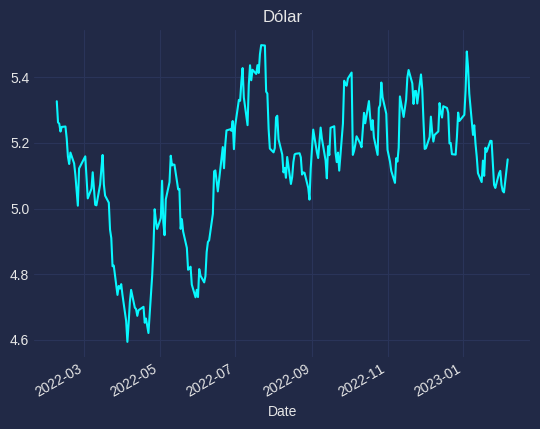

In [42]:
plt.style.use('cyberpunk')
dados_fechamento.plot(y = 'dolar', use_index = True, legend = False)
plt.title('Dólar')
plt.savefig('dolar.png', dpi=300)
plt.show()

## Enviar e-mail

In [ ]:
outlook = win32.Dispatch("outlook.application")
email = outlook.CreateItem(0)

email.To = 'coelho.absc@gmail.com'
email.Subject = 'Relatório Diário'
fulano = 'Antônio'
email.Body = f''' {fulano}, segue o relatório diário:

    Bolsa:
    No ano o Ibovespa está tendo uma rentailidade de {retorno_anual_ibovespa}%,
    enquanto no mês a rentabilidade é de {retorno_mensal_ibovespa}%
    
    No último dia útil, o retorno do Ibovespa foi de {retorno_diario_ibovespa}%.
    
    
    Dólar:
    No ano o Dólar está tendo uma rentailidade de {retorno_anual_dolar}%,
    enquanto no mês a rentabilidade é de {retorno_mensal_dolar}%
    
    No último dia útil, o retorno do Dólar foi de {retorno_diario_dolar}%.

'''

anexo_ibovespa = r'\ibovespa.png'
anexo_dolar = r'\dolar.png'

email.Attachments.Add(anexo_ibovespa)
email.Attachments.Add(anexo_dolar)

email.Send()